In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import  accuracy_score, classification_report

In [2]:
data=pd.read_csv('indicator_estimated_prevalence_150.csv')

#  1. Data Understanding (5 marks)
- a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)
- b. Calculate five-point summary for numerical variables (1 MARK)
- c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 MARK)
- d. Generate the covariance and correlation tables for the data (1 MARK)
- e. Create Visualization plots to find the relationship amongst the variables. (1 MARK)

In [3]:
#checking the top rows
data.head()

,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
0,Slovakia,55,56,59,59,56,51,46,42,38,35,32,30,29,26,25,21,20,20,1
1,Burkina Faso,179,196,208,221,233,246,251,271,286,308,338,368,398,419,426,421,411,403,2
2,Kyrgyzstan,90,93,93,93,101,118,141,165,147,146,156,169,153,145,139,136,135,134,1
3,Oman,40,36,29,25,22,22,15,15,14,14,13,14,13,13,12,13,13,14,1
4,Sweden,5,5,6,6,5,5,5,4,4,4,4,4,4,4,4,4,4,5,1


In [4]:
#checking the no of rows and columns
data.shape

(150, 20)

In [5]:
#renaming the column name to country_name for better understanding
data.rename({"TB prevalence, all forms (per 100 000 population per year)":'Country_Name'},axis=1,inplace=True)

In [6]:
data.head()

,Country_Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
0,Slovakia,55,56,59,59,56,51,46,42,38,35,32,30,29,26,25,21,20,20,1
1,Burkina Faso,179,196,208,221,233,246,251,271,286,308,338,368,398,419,426,421,411,403,2
2,Kyrgyzstan,90,93,93,93,101,118,141,165,147,146,156,169,153,145,139,136,135,134,1
3,Oman,40,36,29,25,22,22,15,15,14,14,13,14,13,13,12,13,13,14,1
4,Sweden,5,5,6,6,5,5,5,4,4,4,4,4,4,4,4,4,4,5,1


In [7]:
data.tail()

,Country_Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
145,Senegal,380,379,379,378,377,376,372,388,397,424,420,430,443,441,454,456,461,468,2
146,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387,0
147,Suriname,109,100,79,80,76,78,88,101,118,122,115,113,113,120,126,136,146,155,1
148,Pakistan,430,428,427,426,424,422,421,421,415,420,413,406,376,355,333,289,260,223,2
149,Bahamas,54,53,52,52,53,54,54,54,55,46,45,45,51,51,50,50,50,51,1


In [8]:
#checking the column names
data.columns

Index(['Country_Name', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', 'class'],
      dtype='object')

In [9]:
# checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
Country_Name    150 non-null object
1990            150 non-null object
1991            150 non-null object
1992            150 non-null object
1993            150 non-null object
1994            150 non-null object
1995            150 non-null object
1996            150 non-null int64
1997            150 non-null int64
1998            150 non-null int64
1999            150 non-null int64
2000            150 non-null int64
2001            150 non-null int64
2002            150 non-null int64
2003            150 non-null int64
2004            150 non-null object
2005            150 non-null object
2006            150 non-null object
2007            150 non-null object
class           150 non-null int64
dtypes: int64(9), object(11)
memory usage: 23.5+ KB


In [10]:
## from the above we can see that there is problem with some of the columns,the numerical columns are read as object 

In [11]:
data.select_dtypes(include=['object'])

,Country_Name,1990,1991,1992,1993,1994,1995,2004,2005,2006,2007
0,Slovakia,55,56,59,59,56,51,25,21,20,20
1,Burkina Faso,179,196,208,221,233,246,426,421,411,403
2,Kyrgyzstan,90,93,93,93,101,118,139,136,135,134
3,Oman,40,36,29,25,22,22,12,13,13,14
4,Sweden,5,5,6,6,5,5,4,4,4,5
5,Italy,11,10,10,9,9,8,6,6,6,6
6,Saint Vincent and the Grenadines,45,45,44,43,42,42,36,36,34,39
7,Djibouti,"1,485","1,477","1,463","1,442","1,414","1,381","1,034","1,046","1,093","1,104"
8,Bahrain,120,113,108,101,97,92,48,45,45,60
9,Cape Verde,449,438,428,418,408,398,367,278,285,280


## We can see that ',' in the numerical columns is read as object that's the reason we are getting this problem of object type in place of numerical type

In [12]:
data.columns[data.dtypes=='object']

Index(['Country_Name', '1990', '1991', '1992', '1993', '1994', '1995', '2004',
       '2005', '2006', '2007'],
      dtype='object')

In [13]:
#Now let us convert the dataset from object to numerical type
to_conver= ['1990','1991', '1992', '1993', '1994', '1995', '2004', '2005', '2006', '2007']
for i in to_conver:
    data[i]=data[i].str.replace(',','').astype(int)

In [14]:
#chekcing the datatype once again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
Country_Name    150 non-null object
1990            150 non-null int32
1991            150 non-null int32
1992            150 non-null int32
1993            150 non-null int32
1994            150 non-null int32
1995            150 non-null int32
1996            150 non-null int64
1997            150 non-null int64
1998            150 non-null int64
1999            150 non-null int64
2000            150 non-null int64
2001            150 non-null int64
2002            150 non-null int64
2003            150 non-null int64
2004            150 non-null int32
2005            150 non-null int32
2006            150 non-null int32
2007            150 non-null int32
class           150 non-null int64
dtypes: int32(10), int64(9), object(1)
memory usage: 17.7+ KB


In [15]:
# five-point summary for numerical variables
data.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,199.073333,198.606667,196.666667,194.246667,191.673333,191.493333,183.493333,185.880000,183.573333,186.826667,184.520000,185.500000,186.553333,184.326667,182.273333,179.073333,176.966667,174.866667,1.166667
std,235.147593,232.326081,228.507990,224.324996,220.587303,217.514043,192.801033,193.767865,189.695989,197.930933,202.723329,209.753795,210.561363,215.452777,216.526976,216.777407,216.983450,218.423045,0.560640
min,5.000000,5.000000,4.000000,6.000000,5.000000,5.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.000000,37.000000,35.250000,34.250000,34.250000,30.750000,30.250000,28.500000,27.000000,25.250000,26.250000,24.250000,22.250000,21.250000,20.750000,20.500000,1.000000
50%,102.000000,96.000000,92.500000,92.000000,91.000000,91.500000,91.000000,93.000000,89.500000,90.500000,87.500000,82.000000,81.000000,71.500000,71.000000,68.000000,69.000000,67.000000,1.000000
75%,310.750000,316.750000,325.000000,318.750000,315.000000,317.250000,319.500000,329.250000,337.750000,348.500000,342.500000,343.750000,354.750000,347.500000,328.000000,295.750000,289.750000,287.500000,1.750000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,698.000000,701.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000,2.000000


In [16]:
#checking for the correlation between the features
data.corr()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
1990,1.000000,0.997189,0.992784,0.989703,0.984556,0.977066,0.929619,0.910146,0.892847,0.864701,0.860131,0.840840,0.823002,0.804895,0.796391,0.785898,0.787474,0.777562,-0.058994
1991,0.997189,1.000000,0.998379,0.996436,0.990122,0.987006,0.939580,0.921436,0.906184,0.874785,0.870915,0.853671,0.837937,0.821503,0.815076,0.804431,0.806188,0.793680,-0.047104
1992,0.992784,0.998379,1.000000,0.998368,0.993472,0.991737,0.944612,0.929280,0.915001,0.882544,0.877797,0.860897,0.846111,0.830072,0.823491,0.813151,0.814305,0.801440,-0.039378
1993,0.989703,0.996436,0.998368,1.000000,0.996870,0.996568,0.950337,0.933702,0.920420,0.891008,0.888123,0.872088,0.858919,0.843865,0.837123,0.826976,0.827443,0.814478,-0.027972
1994,0.984556,0.990122,0.993472,0.996870,1.000000,0.996706,0.952569,0.937370,0.925545,0.903512,0.901120,0.885395,0.873040,0.858962,0.849164,0.840346,0.838838,0.829305,-0.015240
1995,0.977066,0.987006,0.991737,0.996568,0.996706,1.000000,0.959718,0.946263,0.936198,0.910526,0.909596,0.896063,0.884025,0.871081,0.864278,0.854770,0.853883,0.840932,-0.005907
1996,0.929619,0.939580,0.944612,0.950337,0.952569,0.959718,1.000000,0.988894,0.972385,0.953888,0.938888,0.926413,0.906192,0.884035,0.868279,0.857884,0.854311,0.839534,0.049713
1997,0.910146,0.921436,0.929280,0.933702,0.937370,0.946263,0.988894,1.000000,0.988906,0.968048,0.955437,0.944078,0.905250,0.904253,0.889122,0.878363,0.873034,0.858257,0.061039
1998,0.892847,0.906184,0.915001,0.920420,0.925545,0.936198,0.972385,0.988906,1.000000,0.980995,0.976141,0.963719,0.927620,0.932887,0.921772,0.912771,0.907572,0.893236,0.086813
1999,0.864701,0.874785,0.882544,0.891008,0.903512,0.910526,0.953888,0.968048,0.980995,1.000000,0.985584,0.977584,0.949163,0.950651,0.937186,0.931525,0.925759,0.921091,0.115115


# We can observe that there is multi colinearity between the features

In [17]:
data.cov()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
1990,55294.390559,54477.378031,53345.360179,52206.330783,51069.473781,49974.883043,42145.836063,41469.935034,39826.850291,40245.757763,41002.350872,41472.855705,40749.314855,40778.539642,40548.859016,40060.907338,40179.391723,39936.868904,-7.777405
1991,54477.378031,53975.408009,53002.297539,51930.788949,50741.978031,49877.557763,42086.342998,41480.576644,39936.730380,40226.548814,41018.259597,41600.479866,40990.930515,41120.565593,41002.269306,40513.599508,40640.698210,40275.598210,-6.135347
1992,53345.360179,53002.297539,52215.901566,51176.384787,50076.903803,49292.997763,41616.373602,41146.194631,39662.595078,39916.384787,40662.959732,41263.167785,40710.615213,40866.686801,40744.816555,40279.756152,40375.223714,40001.022371,-5.044743
1993,52206.330783,51930.788949,51176.384787,50321.703848,49328.356286,48626.394273,41102.145951,40585.211007,39167.146219,39561.526264,40388.193020,41034.365772,40570.312260,40785.234318,40661.106622,40214.679776,40275.632438,39907.570022,-3.517897
1994,51069.473781,50741.978031,50076.903803,49328.356286,48658.758345,47822.793110,40512.236063,40065.759195,38728.973781,39448.285280,40296.466309,40966.379195,40550.208814,40823.147696,40558.707338,40183.977136,40149.968904,39957.043400,-1.884787
1995,49974.883043,49877.557763,49292.997763,48626.394273,47822.793110,47312.359016,40247.620761,39882.348188,38628.956868,39200.663266,40108.795436,40882.355705,40488.403043,40822.347830,40705.454855,40304.218613,40300.674273,39952.764206,-0.720358
1996,42145.836063,42086.342998,41616.373602,41102.145951,40512.236063,40247.620761,37172.238210,36943.724027,35563.601163,36401.602864,36696.688054,37464.832215,36788.161432,36722.388098,36247.709888,35855.191767,35739.801790,35354.623266,5.373602
1997,41469.935034,41480.576644,41146.194631,40585.211007,40065.759195,39882.348188,36943.724027,37545.985503,36349.203490,37127.213960,37530.780940,38370.691275,36934.227919,37750.583087,37303.965906,36895.196779,36706.224161,36324.346309,6.630872
1998,39826.850291,39936.730380,39662.595078,39167.146219,38728.973781,38628.956868,35563.601163,36349.203490,35984.568412,36833.147025,37538.290470,38345.838926,37051.579955,38127.603400,37861.150962,37534.796600,37356.475615,37010.311857,9.232662
1999,40245.757763,40226.548814,39916.384787,39561.526264,39448.285280,39200.663266,36401.602864,37127.213960,36833.147025,39176.654318,39546.761879,40586.140940,39557.881790,40540.312036,40165.349709,39968.891991,39759.249217,39821.218345,12.774049


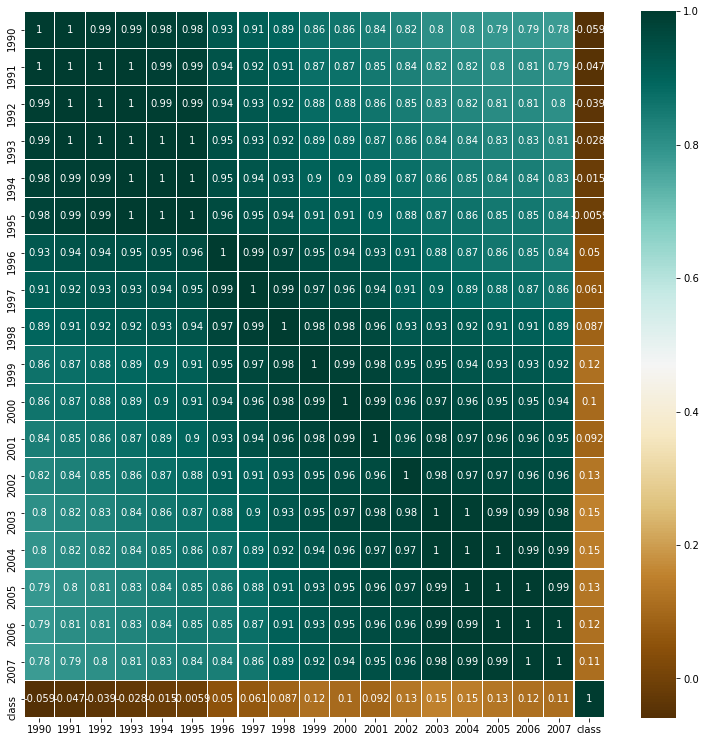

In [18]:
# Visualizing the correlation
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(), annot=True, linewidths=0.1, cmap='BrBG')

- Looking at the heatmap also, the maximum part of it is dark shaded, which means the correlation co-efficient is higher for them.
- This means most of the features are highly co-related with each other either positively or negatively. This explains there is a higher degree of multi-colinearity present in the dataset.

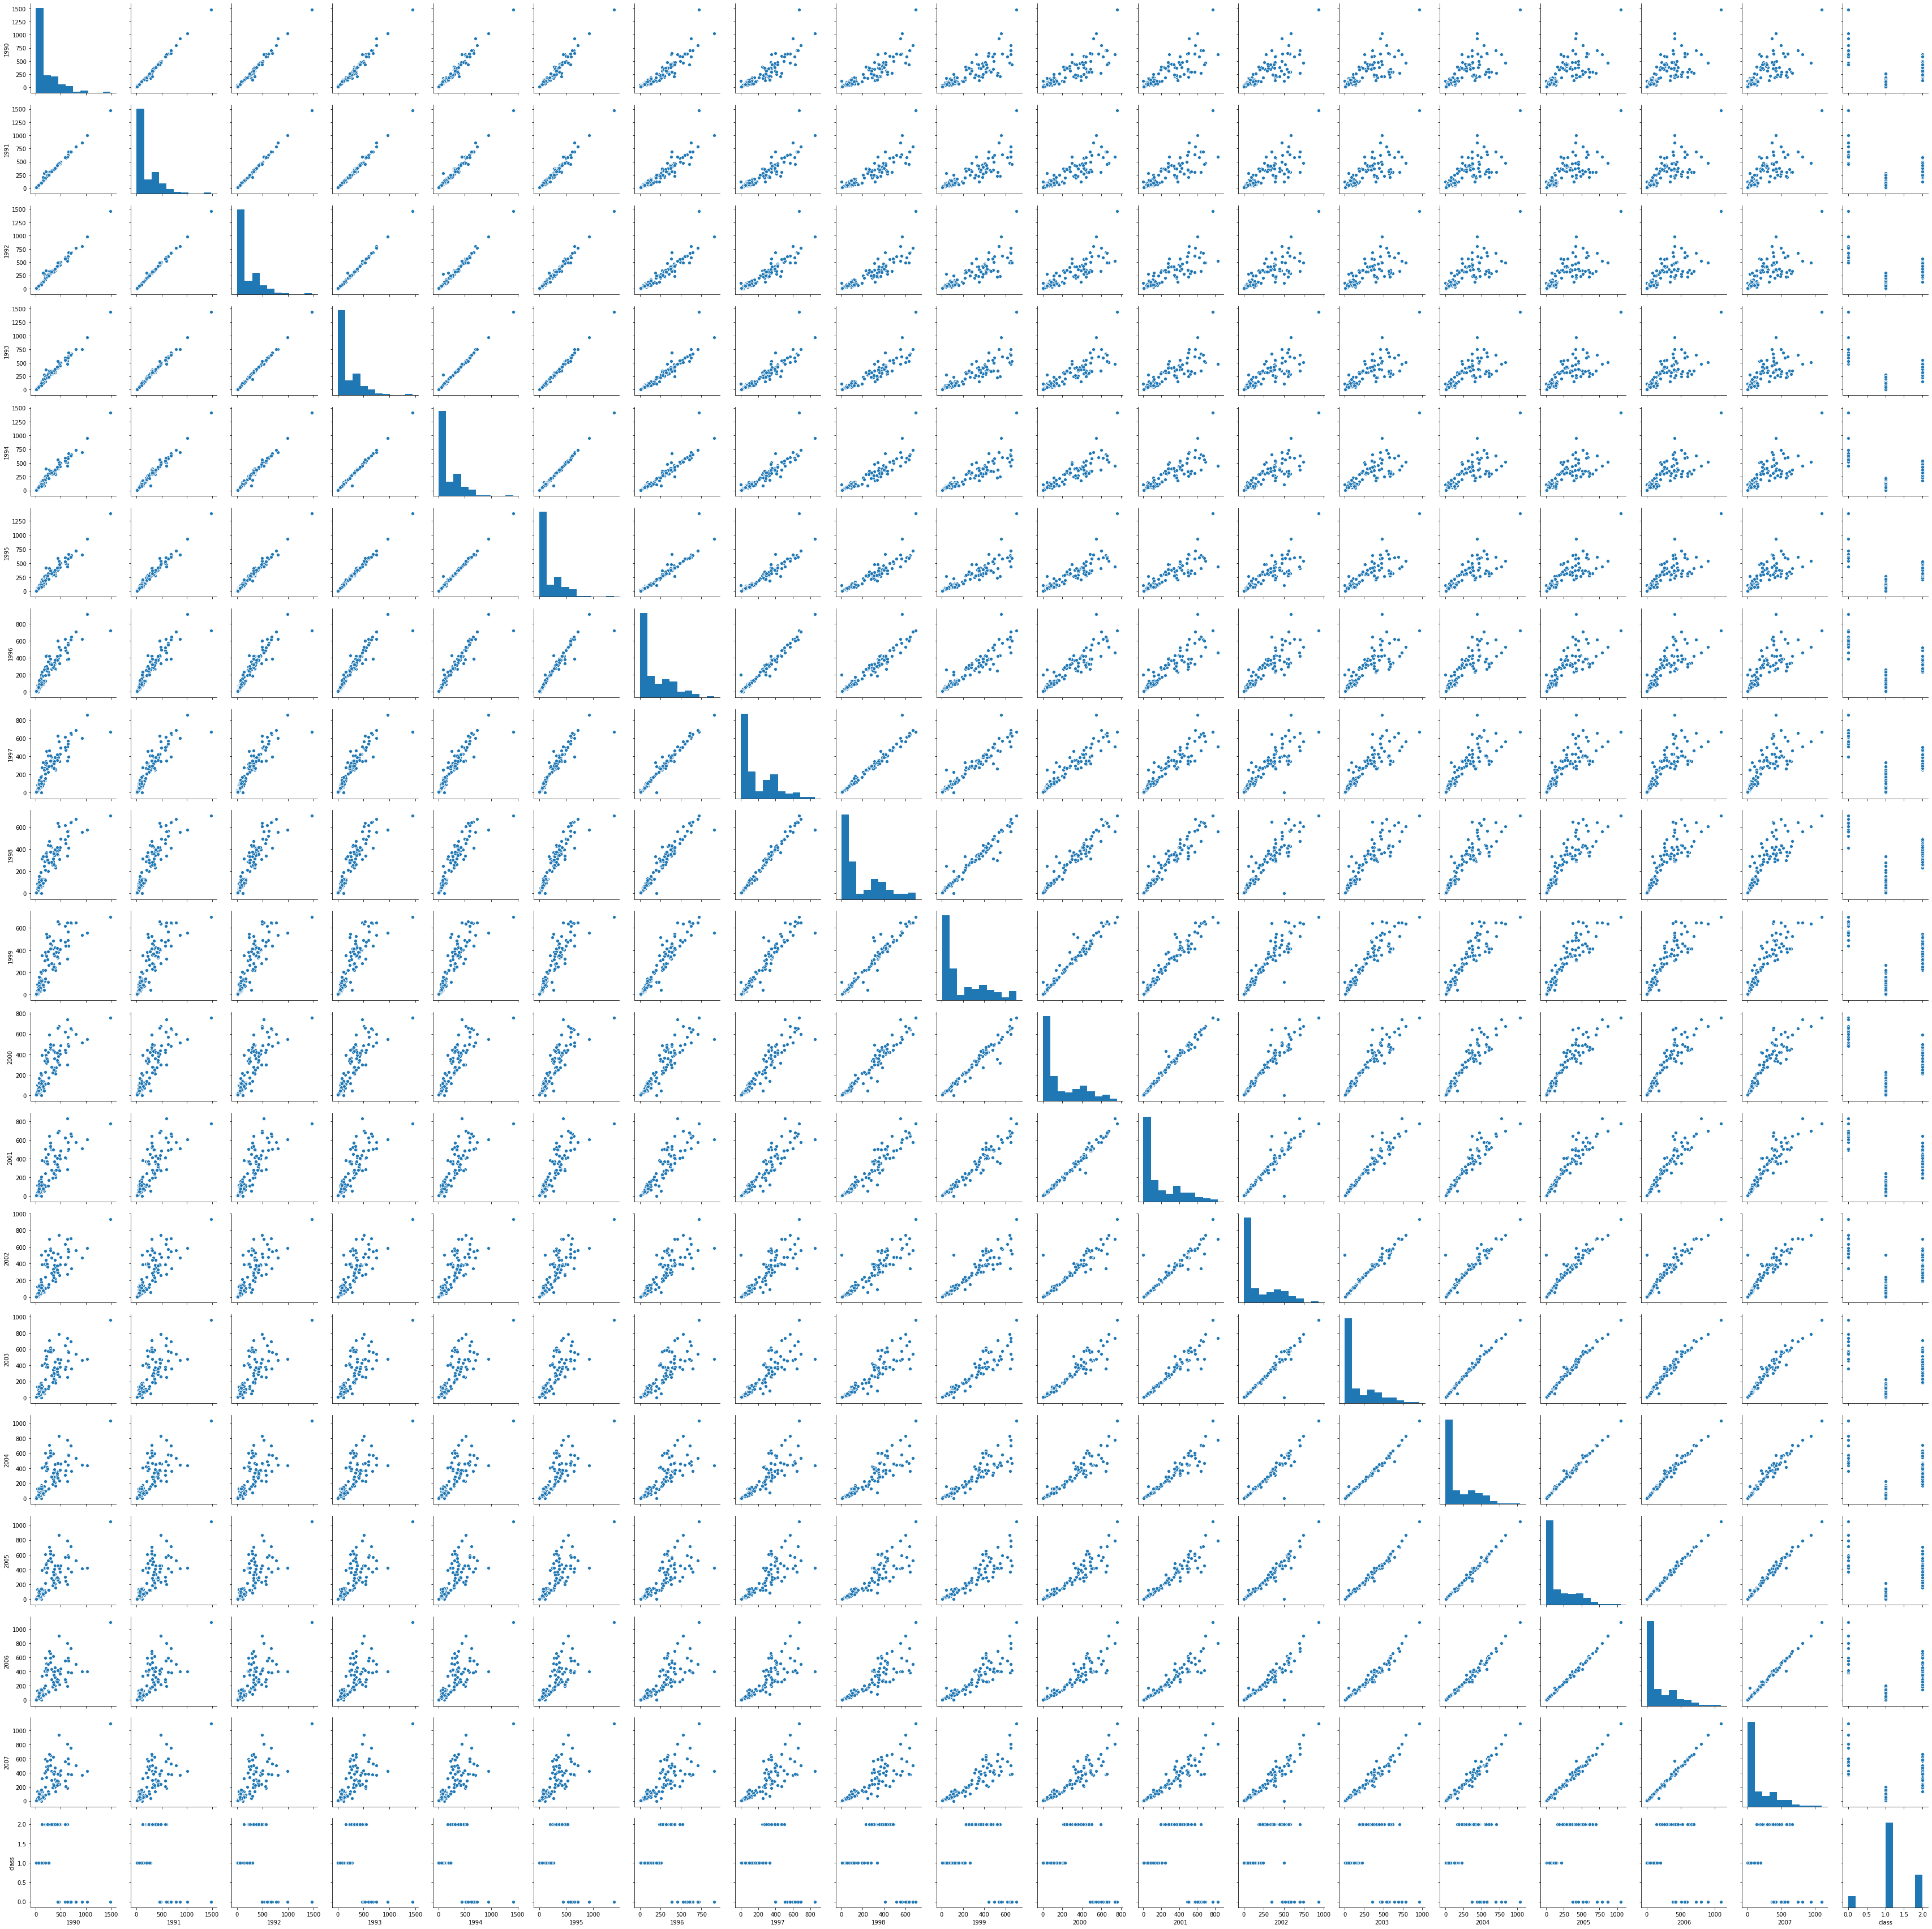

In [19]:
# Let us check for the pair plot 
sns.pairplot(data)

## We observe that there is a high correlation among the features

In [20]:
#checking for null values
data.isnull().sum()

Country_Name    0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
class           0
dtype: int64

## There are no null values present in the data

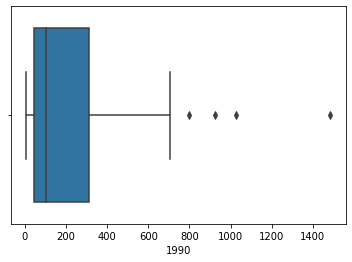

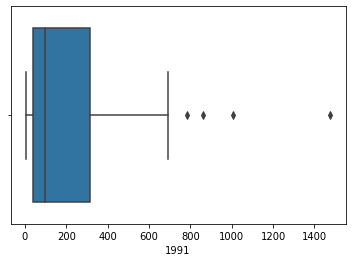

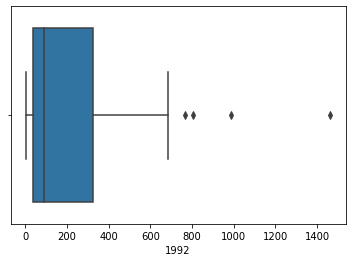

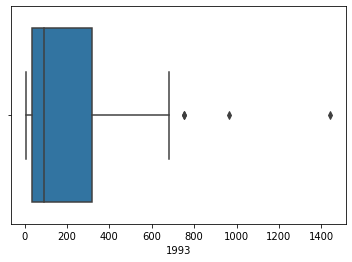

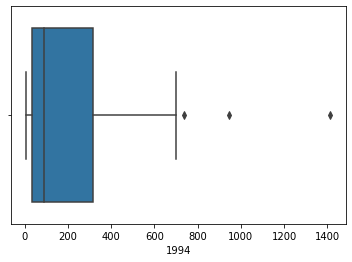

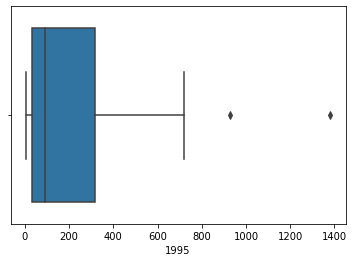

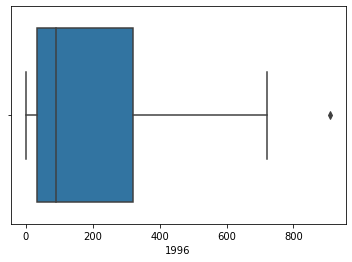

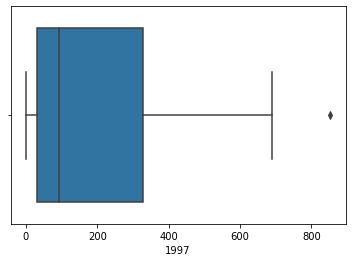

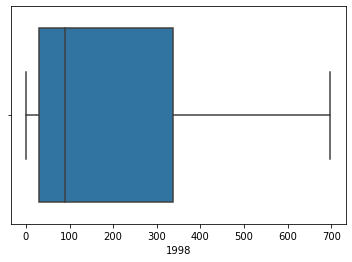

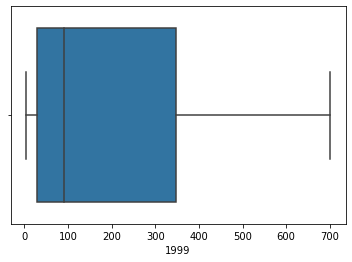

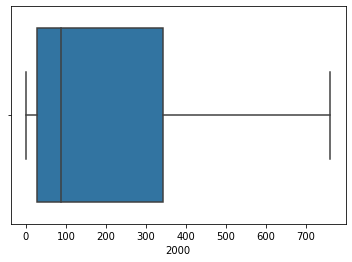

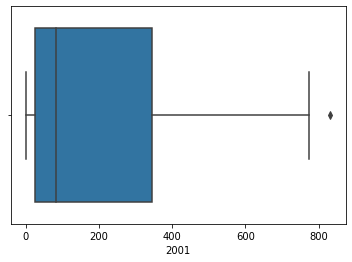

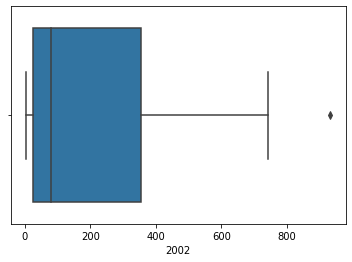

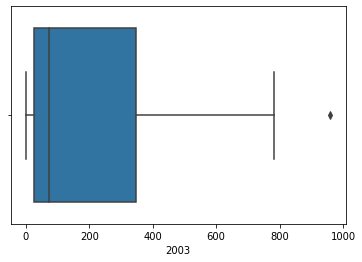

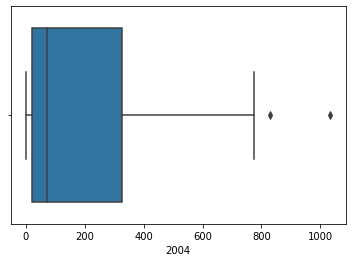

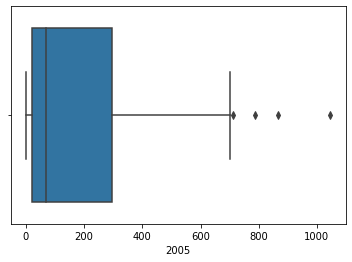

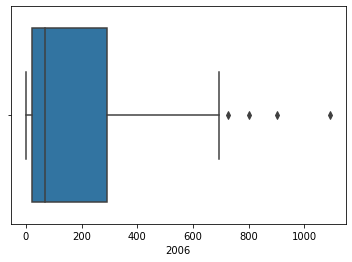

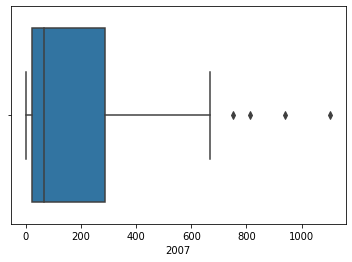

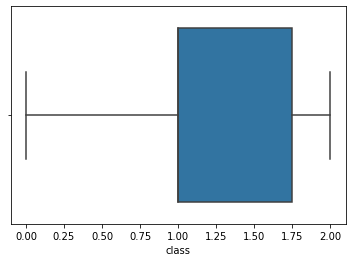

In [21]:
#Checking for any outliers
for i,e in enumerate(data.columns[1:]):
    plt.figure(i)
    sns.boxplot(data[e])

## There are outliers present in the dataset. This can be due to the presence of extreme values.So we won't be treating the outliers.

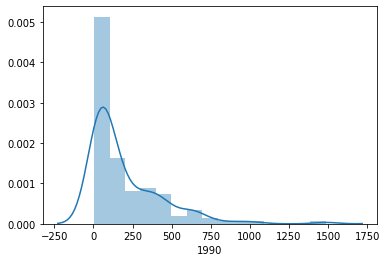

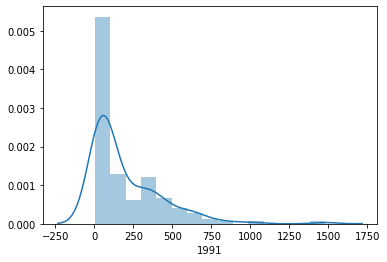

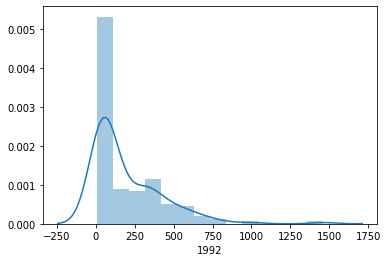

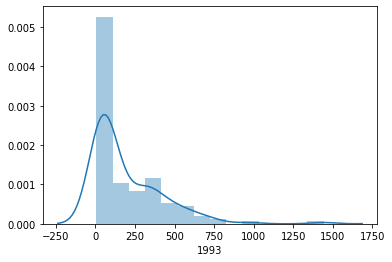

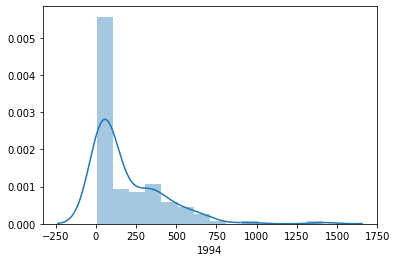

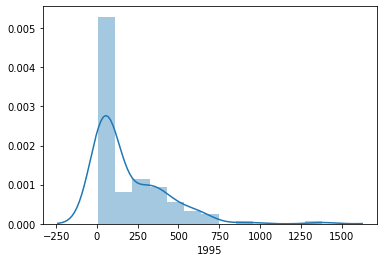

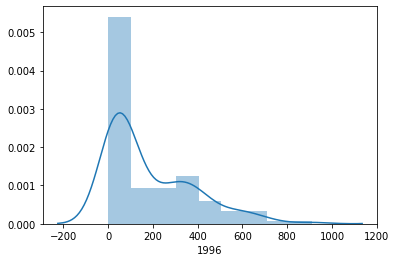

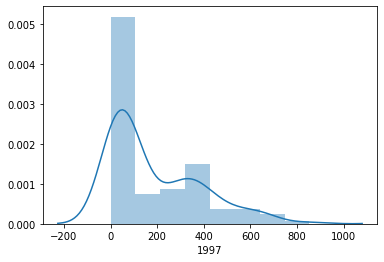

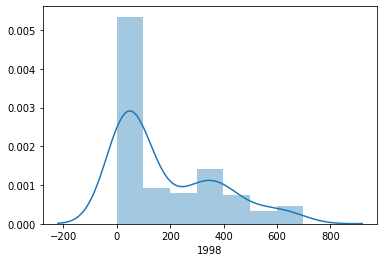

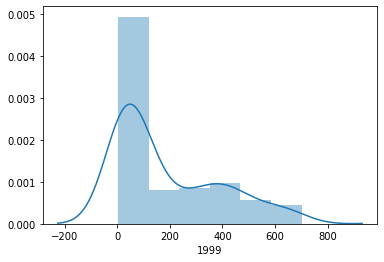

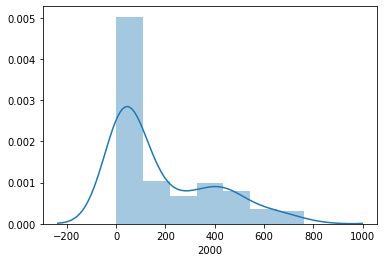

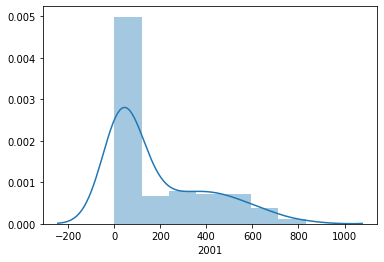

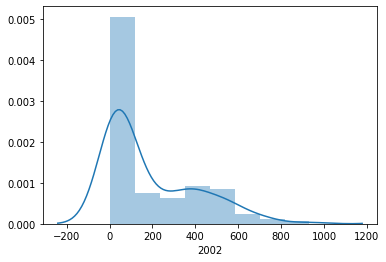

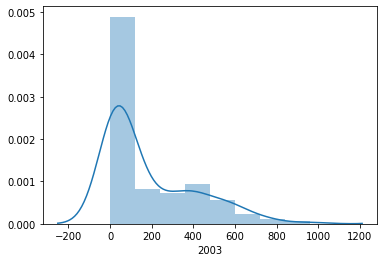

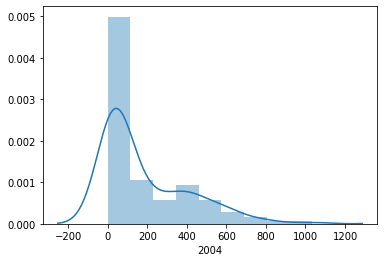

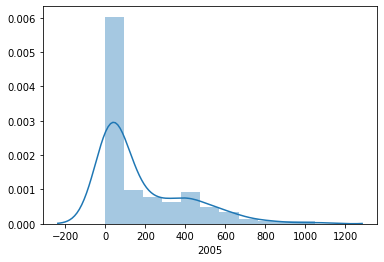

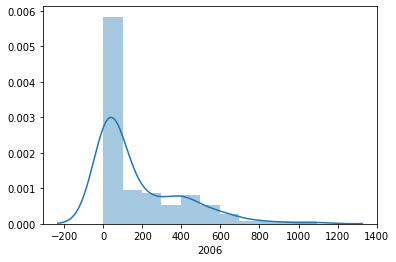

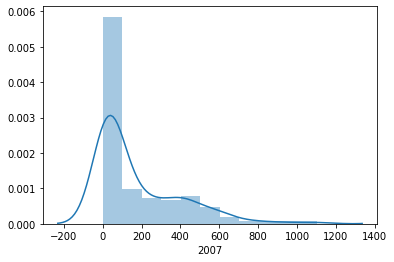

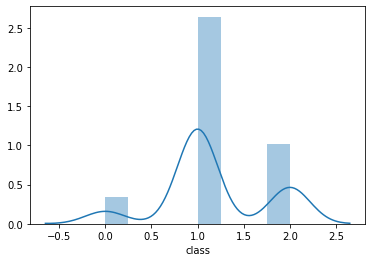

In [22]:
#Checking the distplot
for i,e in enumerate(data.columns[1:]):
    plt.figure(i)
    sns.distplot(data[e])

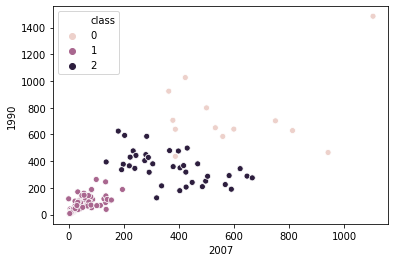

In [23]:
#let us check for scatter plot for two years
sns.scatterplot(data['2007'],data['1990'],hue=data['class'])

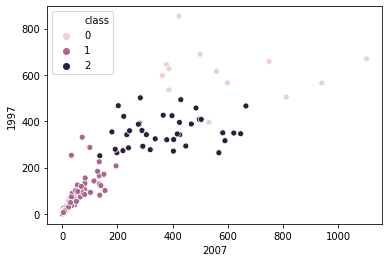

In [24]:
sns.scatterplot(data['2007'],data['1997'],hue=data['class'])

## We can see from the scatter plot of 1997 and 2007 there is one category with value 0-200 in both 1997 and 2007 and the next category is in the  range of 200-400 in 1997 and 200-600 in 2007 and final category is above 400 in 1997.

## So with these plots we can confirm that clustering will do a better job in this dataset

In [25]:
data.nunique()

Country_Name    150
1990            122
1991            118
1992            122
1993            116
1994            118
1995            121
1996            114
1997            119
1998            119
1999            115
2000            112
2001            114
2002            112
2003            117
2004            114
2005            108
2006            108
2007            110
class             3
dtype: int64

In [26]:
data.groupby('class').size()

class
0    13
1    99
2    38
dtype: int64

In [27]:
# Compare class wise mean
pd.pivot_table(data, index='class', aggfunc=['mean']).T

class               0          1           2
mean 1990  745.076923  67.383838  355.368421
     1991  735.384615  66.868687  358.184211
     1992  722.076923  66.272727  356.631579
     1993  708.384615  64.515152  356.342105
     1994  695.461538  62.202020  356.631579
     1995  685.307692  62.888889  357.605263
     1996  610.076923  63.373737  350.500000
     1997  608.923077  64.797980  356.605263
     1998  589.692308  63.020202  358.710526
     1999  599.307692  59.272727  378.026316
     2000  612.769231  54.121212  377.736842
     2001  629.769231  52.555556  379.868421
     2002  598.230769  55.707071  386.605263
     2003  594.615385  48.727273  397.236842
     2004  591.307692  48.202020  391.631579
     2005  594.384615  46.171717  383.236842
     2006  595.538462  45.545455  376.157895
     2007  595.000000  43.626263  373.052632

# 2. Dimensionality Reduction (10 marks)
- a. How will you decide when to apply PCA based on the correlation? (2 marks)
- b. Apply PCA on the above dataset and determine the number of PCA components to be used so that 95% of the variance in data is explained by the same. (8 marks)

In [28]:
# Divide the dataset into Input features and Target variables
X = data.drop(['class','Country_Name'], axis=1)
y = data['class']

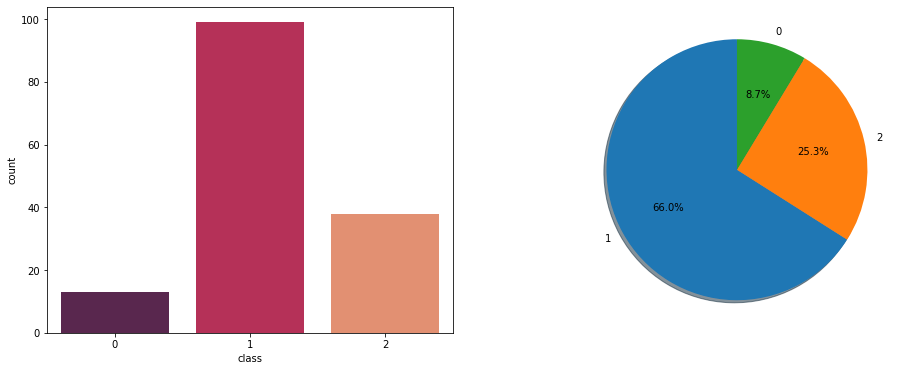

In [29]:
# Check the frequency distribution of each target class
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.countplot(y, ax=axes[0], palette='rocket')
_ = axes[1].pie(y.value_counts(), autopct='%1.1f%%', shadow=True, startangle=90, labels=y.value_counts().index)

# PCA
- We do feature engineering where algorithms run their logic to reduce the higher no. of dimensions. PCA is one such feature extraction technique.

# Let us Standardize the data
- StandardScaler() will normalize the features so that each column/feature/variable will have mean = 0 and standard deviation=1

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
1990,150.0,6.809368e-17,1.00335,-0.828091,-0.670215,-0.414202,0.476513,5.486914
1991,150.0,8.141636e-18,1.00335,-0.836132,-0.684977,-0.443129,0.510227,5.521016
1992,150.0,6.735353e-17,1.00335,-0.845975,-0.701076,-0.457383,0.563496,5.560312
1993,150.0,-7.549517e-17,1.00335,-0.841981,-0.703325,-0.457324,0.556873,5.580891
1994,150.0,-1.080617e-16,1.00335,-0.849091,-0.711498,-0.457917,0.560956,5.559801
1995,150.0,4.440892e-18,1.00335,-0.860258,-0.725333,-0.461250,0.580091,5.486964
1996,150.0,-4.440892e-17,1.00335,-0.954912,-0.776673,-0.481342,0.707788,3.780792
1997,150.0,1.850372e-17,1.00335,-0.962506,-0.803279,-0.480942,0.742385,3.454417
1998,150.0,4.440892e-17,1.00335,-0.970966,-0.810966,-0.497578,0.815479,2.720933
1999,150.0,6.883383e-17,1.00335,-0.926784,-0.802588,-0.488298,0.819553,2.606444


In [32]:
covar_matrix = PCA(n_components=X_scaled.shape[1])
covar_matrix

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
covar_matrix.fit(X_scaled)

# calculating variance ratios
var = covar_matrix.explained_variance_ratio_;var

array([9.18266606e-01, 5.88481808e-02, 1.32535456e-02, 2.80806244e-03,
       2.17467663e-03, 1.31727536e-03, 9.59365767e-04, 8.53820244e-04,
       5.42616490e-04, 3.13575730e-04, 2.46478406e-04, 1.35223056e-04,
       9.88156030e-05, 7.58263244e-05, 5.56103811e-05, 3.43344011e-05,
       1.11552710e-05, 4.83140218e-06])

In [34]:
# cumulative sum of variance explained with [n] features
eigen_vals = np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100
np.cumsum(eigen_vals)

array([91.8, 97.7, 99. , 99.3, 99.5, 99.6, 99.7, 99.8, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9])

Observation:

- In the above array we see that the first feature explains roughly 91% of the variance within our data set while the first two explain 97.7% and so on.
- If we employ 3 features we capture 99% (threshold = 95%) of the variance within the dataset, thus we gain very little by implementing an additional feature.

#### Cumulative Eigen value plot

(0, 12)

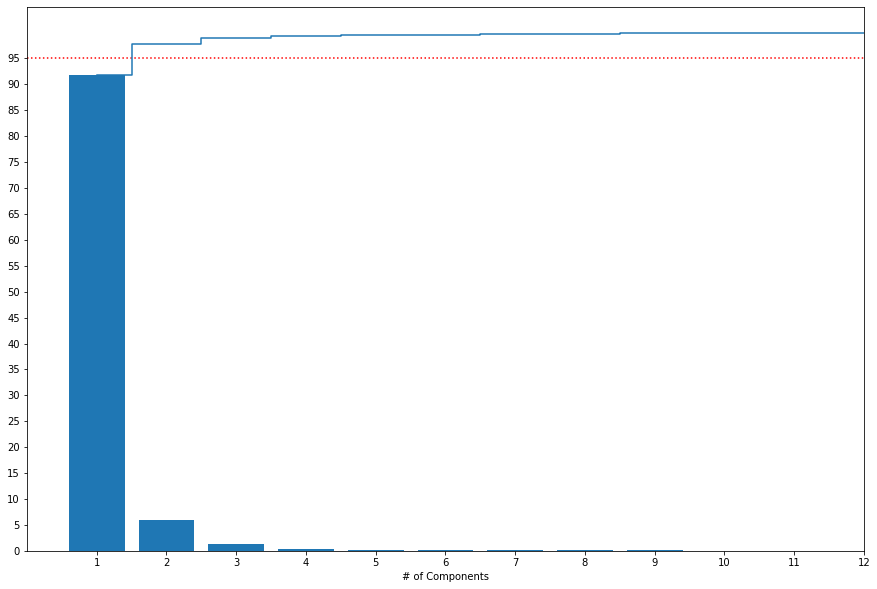

In [35]:
plt.figure(figsize=(15,10))
plt.axhline(y=95, color='r', linestyle=':')
plt.bar(np.arange(1, len(eigen_vals) + 1), eigen_vals)
plt.plot(np.arange(1, len(np.cumsum(eigen_vals))+1), np.cumsum(eigen_vals), drawstyle='steps-mid')
plt.yticks(np.arange(0,100,5))
_, _ = plt.xticks(np.arange(1,18,1)), plt.xlabel('# of Components')
plt.xlim(0, 12)

- Let us cross check with the K-means clustering.

In [36]:
from sklearn.cluster import KMeans
cluster_range=range(1,15)
cluster_inertia=[]
for num_clusters in cluster_range:
    model=KMeans(num_clusters)
    model.fit(X_scaled)
    cluster_inertia.append(model.inertia_)

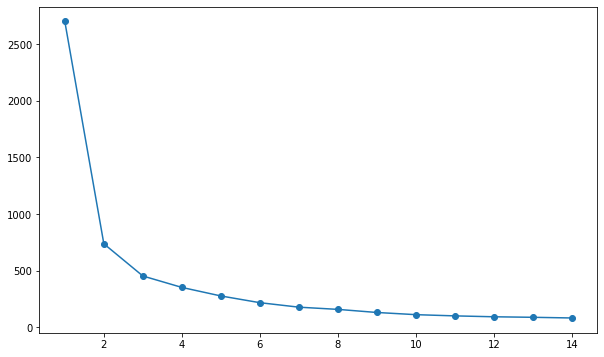

In [37]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range,cluster_inertia,marker='o')

# The above elbow plot we can see that the drop in the inertia is more after the 3 so we can choose the number of cluster to be 3

# 3. Clustering: Use PCA dimensions to cluster the data. Apply K-means and Agglomerative clustering.(30 Marks)
 Some pointers which would help you, but don’t be limited by these
- a. Find the optimal K Value. (5 marks)
- b. Apply Clustering and find out if the data points have been clustered correctly using appropriate visualization (20 marks)
- c. Evaluate the clusters formed using appropriate metrics to support the model built and compare both the models. (5 marks)

In [38]:
# Create a new matrix using the n components
X = data.drop(['class','Country_Name'],axis=1)
X_proj = PCA(n_components=3).fit_transform(X)
y = data['class']
X_proj.shape

(150, 3)

In [39]:
df=X_proj[:,0:3]
df=pd.DataFrame(df)
df

,0,1,2
0,-627.109168,45.688302,23.112532
1,515.818682,-394.954645,19.795146
2,-243.409241,-100.924837,-59.310459
3,-712.478888,18.789494,40.507301
4,-773.710638,-7.587979,31.431543
5,-760.229290,-3.732272,29.962979
6,-625.919567,1.472830,24.649336
7,3776.796323,657.029103,846.891657
8,-467.401601,85.029398,19.116408
9,789.701174,147.457618,-67.252136


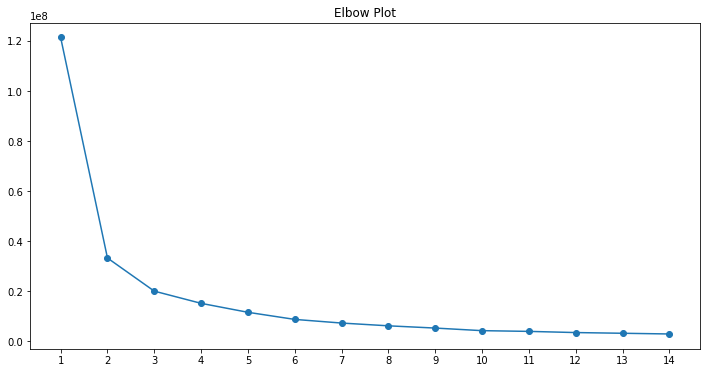

In [40]:
k_range = range(1,15)
kmeans = [KMeans(n_clusters=n) for n in k_range]
sse = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]
plt.figure(figsize=(12,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Plot')
_ = plt.xticks(k_range)

# So we will go by our intuation from the elbow plot to consider 3 clusters and analyze the suitablity of prediction.

In [41]:
# Initialize 3 centroid clusters and fit the dataset
kmeans = KMeans(n_clusters= 3, random_state=1)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

Text(0, 0.5, 'Bin Counts')

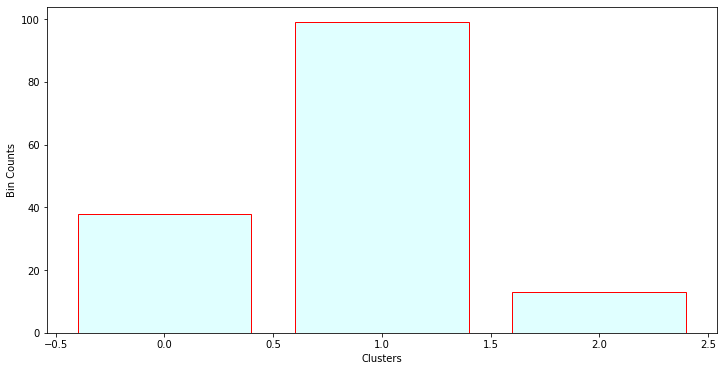

In [42]:
# Lets find out the count of observations in each clusters
labels = kmeans.labels_
plt.figure(figsize=(12,6))
plt.bar(np.unique(labels), np.bincount(labels), color='lightcyan', edgecolor='red')
plt.xlabel('Clusters')
plt.ylabel('Bin Counts')

In [43]:
# Checking the values of the centtroids.
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df

,0,1,2
0,772.042802,-93.793033,-26.795207
1,-549.222427,17.049554,10.107206
2,1925.799520,144.325343,1.354189


In [44]:
# Adding cluster labels to the dataframe.
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
data1 = df.join(df_labels)

In [45]:
# Checking the head of the new labelled dataframe
data1.head()

,0,1,2,labels
0,-627.109168,45.688302,23.112532,1
1,515.818682,-394.954645,19.795146,0
2,-243.409241,-100.924837,-59.310459,1
3,-712.478888,18.789494,40.507301,1
4,-773.710638,-7.587979,31.431543,1


# KMeansClustering_SilhoutteAnalysis

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083261


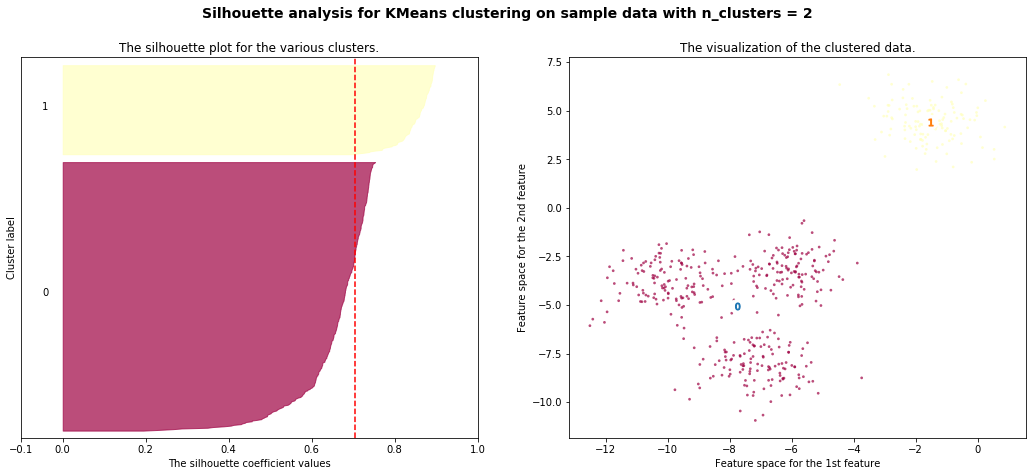

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


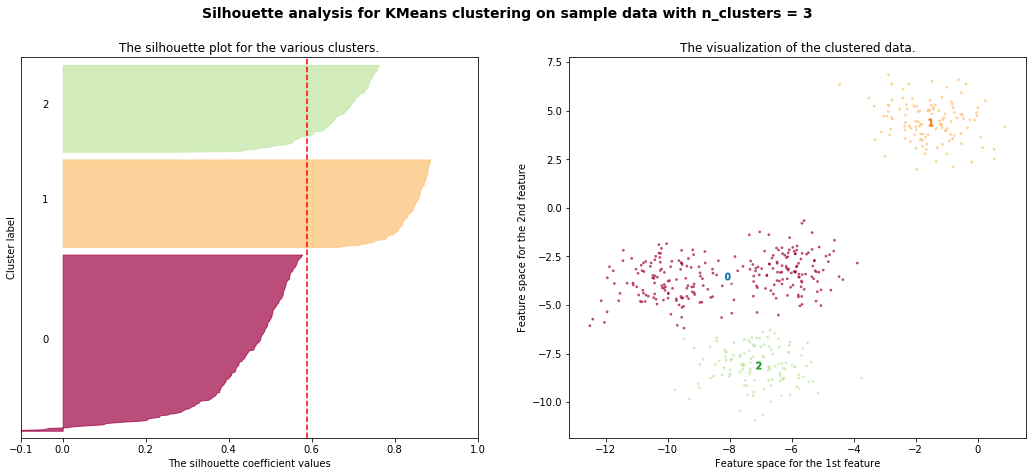

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


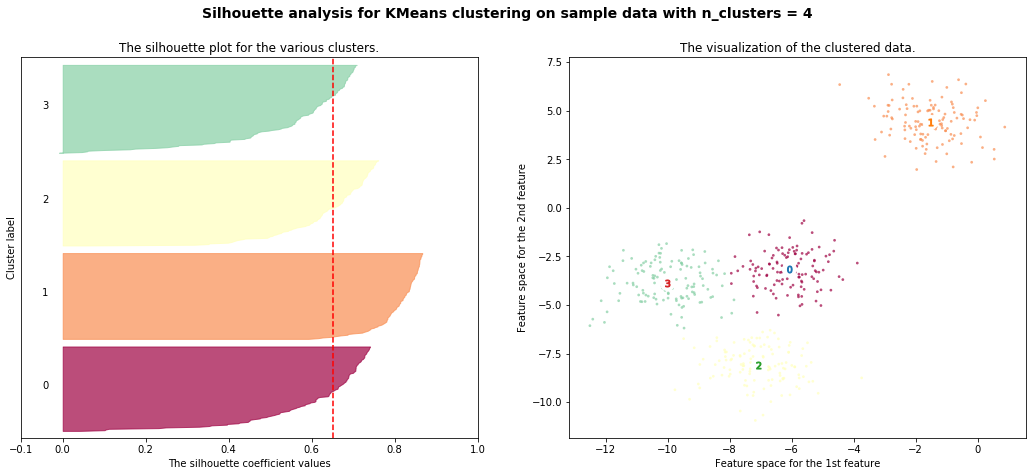

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


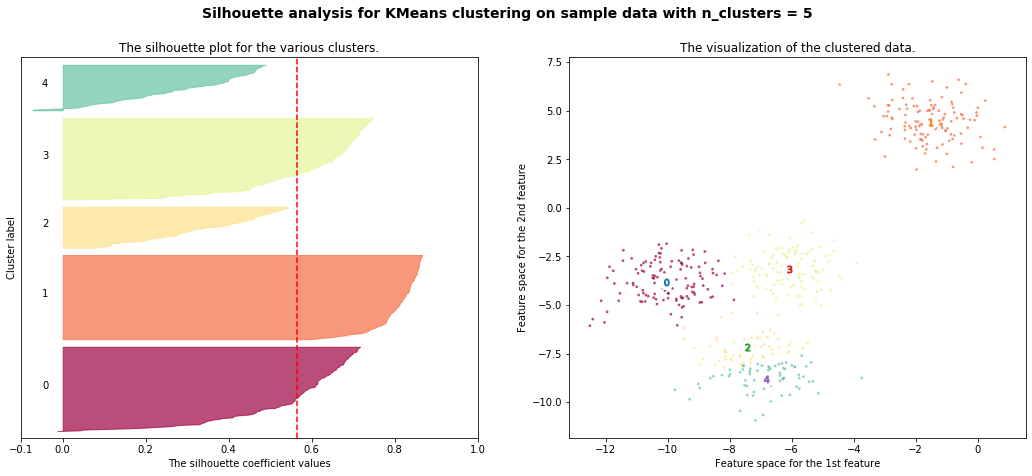

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


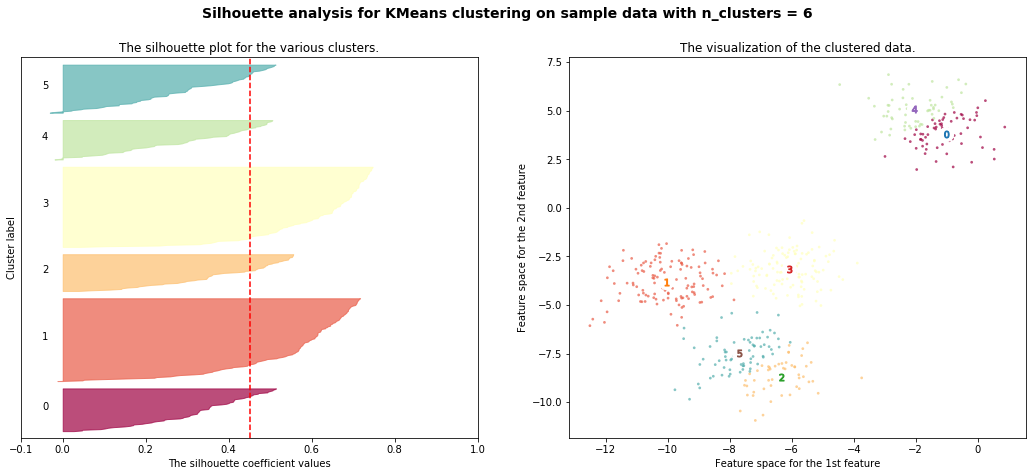

In [46]:
# from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### From Silhouette Analysis we can see that For n_clusters = 3 The average silhouette_score is : 0.5882004012129721 are the perfectly separated clusters

# Agglomerative clustering.

In [47]:
# Let us use ward as linkage metric and distance as Eucledian

In [48]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, 'ward', metric='euclidean')
Z.shape

(149, 4)

In [49]:
Z[:]

array([[5.00000000e+00, 5.70000000e+01, 2.45502293e-01, 2.00000000e+00],
       [1.16000000e+02, 1.31000000e+02, 1.27405149e+00, 2.00000000e+00],
       [4.90000000e+01, 1.05000000e+02, 1.45855059e+00, 2.00000000e+00],
       [1.20000000e+01, 3.20000000e+01, 1.68239214e+00, 2.00000000e+00],
       [1.50000000e+02, 1.52000000e+02, 2.53858948e+00, 4.00000000e+00],
       [3.40000000e+01, 1.23000000e+02, 2.56360128e+00, 2.00000000e+00],
       [1.42000000e+02, 1.53000000e+02, 3.22696307e+00, 3.00000000e+00],
       [1.15000000e+02, 1.40000000e+02, 3.26880244e+00, 2.00000000e+00],
       [2.30000000e+01, 1.14000000e+02, 3.33026006e+00, 2.00000000e+00],
       [4.00000000e+01, 1.58000000e+02, 3.60479458e+00, 3.00000000e+00],
       [6.50000000e+01, 1.59000000e+02, 4.51769415e+00, 4.00000000e+00],
       [1.30000000e+02, 1.51000000e+02, 4.56799887e+00, 3.00000000e+00],
       [4.00000000e+00, 1.56000000e+02, 6.23643978e+00, 4.00000000e+00],
       [9.10000000e+01, 1.21000000e+02, 6.34018477e

Z-Shape: (149, 4)


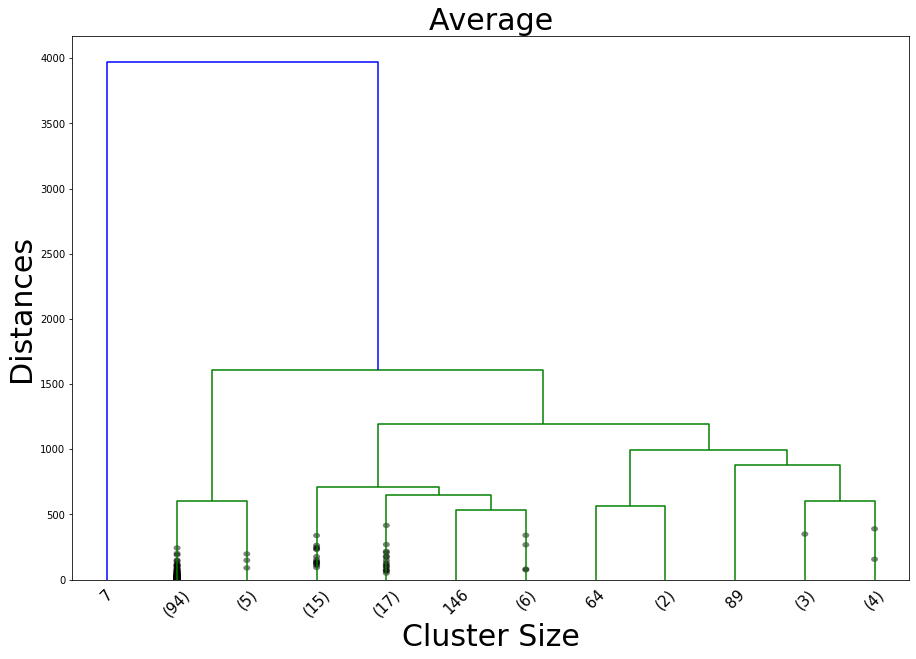

In [50]:
# Let's plot dendogram
plt.figure(figsize=(15,10))
Z=linkage(df,method='average')
print("Z-Shape:",Z.shape)
plt.title("Average",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

In [51]:
# Using Agglomerative Clustering using average linkage
model_a=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
model_a.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [52]:
# Arriving at the cophenet index for average linkage
Z = linkage(df, 'average')
c, coph_dists = cophenet(Z , pdist(df))

c

0.8857223626135133

In [53]:
# Using Agglomerative Clustering using ward linkage
model_w=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
model_w.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [54]:
# Arriving at the cophenet index for ward linkage
Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z , pdist(df))

c

0.7969732218739993

In [55]:
# Using Agglomerative Clustering using complete linkage
model_w=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
model_w.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [56]:
# Arriving at the cophenet index for complete linkage
Z = linkage(df, 'complete')
c, coph_dists = cophenet(Z , pdist(df))

c

0.8640856852641763

# From the various values of cophenet indices that we got, we can deduce that average linkage is the best linkage for this model. Hence we will use model_a further.

## 4. Use the cluster labels from the best method above and convert the problem to a supervised learning classification. (15 marks)
- a. Split dataset into train and test (70:30) (2 marks)
- b. Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks)
- c. In case of a Supervised Machine Learning Problem, how will you decide when to apply PCA & How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. (10 marks)

In [57]:
data.head()

,Country_Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
0,Slovakia,55,56,59,59,56,51,46,42,38,35,32,30,29,26,25,21,20,20,1
1,Burkina Faso,179,196,208,221,233,246,251,271,286,308,338,368,398,419,426,421,411,403,2
2,Kyrgyzstan,90,93,93,93,101,118,141,165,147,146,156,169,153,145,139,136,135,134,1
3,Oman,40,36,29,25,22,22,15,15,14,14,13,14,13,13,12,13,13,14,1
4,Sweden,5,5,6,6,5,5,5,4,4,4,4,4,4,4,4,4,4,5,1


# Before PCA 

In [58]:
data_original=data.copy()
data_original.head()

,Country_Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
0,Slovakia,55,56,59,59,56,51,46,42,38,35,32,30,29,26,25,21,20,20,1
1,Burkina Faso,179,196,208,221,233,246,251,271,286,308,338,368,398,419,426,421,411,403,2
2,Kyrgyzstan,90,93,93,93,101,118,141,165,147,146,156,169,153,145,139,136,135,134,1
3,Oman,40,36,29,25,22,22,15,15,14,14,13,14,13,13,12,13,13,14,1
4,Sweden,5,5,6,6,5,5,5,4,4,4,4,4,4,4,4,4,4,5,1


In [59]:
X=data_original.drop(['Country_Name','class'],axis=1)
y=data_original['class']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [63]:
LR= LogisticRegression()
dt=DecisionTreeClassifier()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(criterion='entropy',n_estimators=10)
Bagged=BaggingClassifier(n_estimators=100)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=150)
GBoost=GradientBoostingClassifier(n_estimators=300)
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')

In [64]:
models = []
models.append(('Logistic Regression',LR))
models.append(('DT',dt))
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoost',GBoost))
models.append(('KNN',KNN))

In [65]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:

Logistic Regression: 0.218133 (0.052389)
DT: 0.087126 (0.044768)
RandomForest: 0.056681 (0.025773)
Bagged: 0.079349 (0.031322)
AdaBoostRF: 0.050584 (0.065077)
GradientBoost: 0.078429 (0.013782)
KNN: 0.000000 (0.000000)


In [66]:
from sklearn.model_selection import cross_val_score
f1_weighted = cross_val_score(LR,X,y,cv=5,scoring='f1_weighted')
f1_weighted

C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: Converge

array([0.7894715 , 0.84981685, 0.78447359, 0.77453581, 0.92857143])

In [67]:
biased_error=1-np.mean(f1_weighted)
biased_error

0.1746261645038063

In [68]:
variance_error= np.var(f1_weighted,ddof=1)
variance_error

0.0041983792157252574

# After applying PCA

In [69]:
data1.shape

(150, 4)

In [70]:
data1.head()

,0,1,2,labels
0,-627.109168,45.688302,23.112532,1
1,515.818682,-394.954645,19.795146,0
2,-243.409241,-100.924837,-59.310459,1
3,-712.478888,18.789494,40.507301,1
4,-773.710638,-7.587979,31.431543,1


In [71]:
X=data1.drop('labels',axis=1)
y=data1['labels']

In [72]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [73]:
LR= LogisticRegression()
dt=DecisionTreeClassifier()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(criterion='entropy',n_estimators=10)
Bagged=BaggingClassifier(n_estimators=100)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=150)
GBoost=GradientBoostingClassifier(n_estimators=300)
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')

In [74]:
models = []
models.append(('Logistic Regression',LR))
models.append(('DT',dt))
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoost',GBoost))
models.append(('KNN',KNN))

In [75]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:

Logistic Regression: 0.083282 (0.049345)
DT: 0.038272 (0.018061)
RandomForest: 0.110965 (0.070559)
Bagged: 0.038272 (0.018061)
AdaBoostRF: 0.101221 (0.018597)
GradientBoost: 0.038272 (0.018061)
KNN: 0.000000 (0.000000)


In [76]:
from sklearn.model_selection import cross_val_score
f1_weighted = cross_val_score(LR,data1,y,cv=5,scoring='f1_weighted')
f1_weighted

C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hemachandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:

array([1.        , 1.        , 0.93671275, 0.96622458, 0.95879121])

In [77]:
biased_error=1-np.mean(f1_weighted)
biased_error

0.027654292315026474

In [78]:
variance_error= np.var(f1_weighted,ddof=1)
variance_error

0.000755105027954295

# Observations:

### As can be seen from above, the model without PCA is an example of an overfit model.

- When we applied PCA to the data, the common spread among the correlated attributes was taken care of and accouonted for in the model, thereby decreasing the bias error. 
- Since only the top 3 PC components were selected, the other attributes were dropped, thereby decreasing the variance error also.
- Hence, by applying PCA we have obtained a moderate bias and variance error. Since variance error is less, we can also see that the model is not an overfitting model. 
- PCA has also helped us achieve Regularisation in the model.


# fitting the final model

In [79]:
DT=DecisionTreeClassifier(max_depth=3)

In [80]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [81]:
y_pred=DT.predict(X_test)

In [82]:
cm=metrics.classification_report(y_test,y_pred)

In [83]:
print(cm)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00        27
           2       1.00      0.75      0.86         4

    accuracy                           0.98        45
   macro avg       0.98      0.92      0.94        45
weighted avg       0.98      0.98      0.98        45



In [84]:
import sklearn
sklearn.metrics.cohen_kappa_score(y_test,y_pred)  ## cohen kappa 

0.9581005586592178

# From the above we can see that the accuarcy of all the models has incresed after doing pca since and we have removed the redundency from the data.

# 5. Summarize as follows (10 marks)
- a. Summarize the overall fit of the model. Compare all the clustering and classification models built and list down the measures to prove that it is a good model.
- b. Write down a business interpretation/explanation of the model.
- c. Which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
- d. What changes from the base model had the most effect on model performance?
- e. What are the key risks to your results and interpretation?

# Summary
### As can be seen from above, the model without PCA is an example of an overfit model.

- When we applied PCA to the data, the common spread among the correlated attributes was taken care of and accouonted for in the model, thereby decreasing the bias error. 
- Since only the top 3 PC components were selected, the other attributes were dropped, thereby decreasing the variance error also.
- Hence, by applying PCA we have obtained a moderate bias and variance error. Since variance error is less, we can also see that the model is not an overfitting model. 
- PCA has also helped us achieve Regularisation in the model.


##### When we built a model on the raw data, that is on the data that was provided, we attained 100% accuracy. A model like this is an overfit model. Even though a model like this would work well for the data provided, when it is applied on a production data, the results will be disappointing. In such a model, variance error is far greater than the bias error. Hence, the application of PCA is a relief

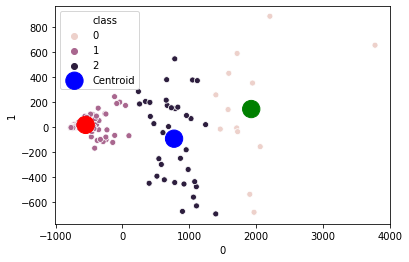

In [85]:
sns.scatterplot(data1.iloc[:,0],data1.iloc[:,1],hue=data['class'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = ['blue','red','green'],label='Centroid')  
plt.legend()
plt.show()

The above plot shows how the clusters are segregated according to PCA and perfect class separation is attained.

# Overall Observations



- 1) We have clustered the data by applying K-means and Agglomerative clustering where k mean was choosen over Agglomerative clustering for classification since we are using the k mean algorithm where cannot see the inner clusters.
- 2)Coming to the business point of view we can say that this model classifies the data witht the accuarcy of 98.7% unless the data fed to it is noisy or has any error.
- 3) Just in case in future if the values completly changes from the test data the model will fail.Since it didnt train on that kind of data. 
- 4) The key risk of this model is that i have used Standard Scaler for scaling if someone want to feed data to the model they have to first scale it then run since there is multicolinarity present in the dataset. We have observed this looking at the heatmap and pairplot.
- 5) To get more fine results we need new data to feed the model soo that we can get the accuracy.